In [1]:
!pip install statsmodels

In [2]:
import pandas as pd

data = {'x' : [1, 2, 3, 4, 5], 'y' : [1, 3, 4, 6, 5]}
df = pd.DataFrame(data)

df

,x,y
0,1,1
1,2,3
2,3,4
3,4,6
4,5,5


In [5]:
import statsmodels.formula.api as smf

lm_model = smf.ols(formula='y ~ x', data=df).fit()  # y~x : y= ax + b형태 

In [6]:
lm_model.params

Intercept    0.5
x            1.1
dtype: float64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

(0.0, 5.0)

<Figure size 864x720 with 0 Axes>

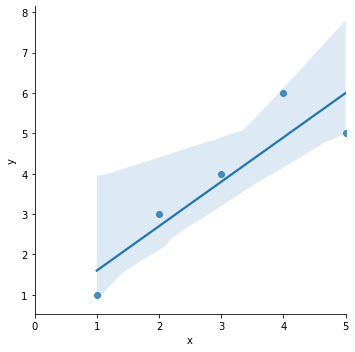

In [10]:
plt.figure(figsize=(12,10))
sns.lmplot(x='x', y='y', data=df)
plt.xlim([0, 5])  # 0부터 시작하도록 


#### 잔차 평가 residue
-  잔차는 직선과의 차이를 말한다. 

In [11]:
resid = lm_model.resid
resid

0   -0.6
1    0.3
2    0.2
3    1.1
4   -1.0
dtype: float64

In [12]:
df

,x,y
0,1,1
1,2,3
2,3,4
3,4,6
4,5,5


#### 결정계수 R-Squared
- 예측 값과 실제값이 일치하면 결정계수는 1이 된다. 즉, 결정계수가 높을 수록 좋은 모델 

In [15]:
# numpy로 직접 결정계수 계산 

import numpy as np

mu = np.mean(df['y'])
y = df['y']

y_hat = lm_model.predict()
np.sum( (y_hat - mu)**2 ) / np.sum( (y - mu)**2)

0.8175675675675674

In [16]:
# 결정계수 함수 
lm_model.rsquared

0.8175675675675675

C:\Users\LEESEYI\miniconda3\envs\ds_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

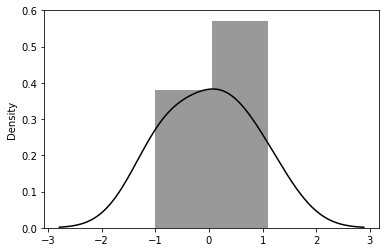

In [19]:
# 잔차의 분포도 확인 
sns.distplot(resid, color='black')